# Exploratory Data Analysis for Fraud Detection in Financial Transactions

Introduction:

Financial fraud poses a significant challenge to modern financial institutions, costing billions of dollars annually and harming consumer trust. In this notebook, I will conduct a comprehensive Exploratory Data Analysis (EDA) to:

1. Understand the data - examine the distribution, structure, and relationships of key features.
2. Identify any patterns - explore statistical summaries, correlations, and visualizations to uncover insights that distinguish fraudulent transactions from legitimate ones.
3. Prepare for modeling - inform the feature engineering and model development phases by highlighting any anomolies, significant predictors, and the potential challenges such as a class imbalance.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,6)

In [36]:
#Loading the data from the cleaned dataset in the Data Wrangling step
cleaned_data_path = 'ieee-fraud-detection_project/data/processed/cleaned_merged_data.csv'
df = pd.read_csv(cleaned_data_path)

print("Data loaded successfully.")
print(f"Data shape: {df.shape}")
df.head()

Data loaded successfully.
Data shape: (590540, 434)


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,361.0,150.0,discover,142.0,...,Unknown,24.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,Unknown,24.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,Unknown,24.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,Unknown,24.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [5]:
#Summarizing the dataset, identify distributions, and identifying any anomolies
#3.1 - Basic information & descriptive statistics

print("DataFrame Info:")
df.info()

print("\nStatistical Summary (Numeric Columns):")
display(df.describe())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(4), object(31)
memory usage: 1.9+ GB

Statistical Summary (Numeric Columns):


,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,...,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,9898.734658,362.531959,153.186458,199.471611,291.653527,86.822813,...,171.534587,14.941738,343.861234,455.936587,253.015742,14.017530,11.014477,321.074815,149.000615,24.329583
std,1.704744e+05,0.183755,4.617224e+06,239.162522,4901.170153,156.595356,11.322604,41.157610,95.949345,2.537300,...,17.802017,0.476714,68.724711,79.347430,21.504133,0.671691,0.266639,9.119718,3.001358,1.597937
min,2.987000e+06,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,...,100.000000,10.000000,100.000000,100.000000,100.000000,10.000000,11.000000,100.000000,100.000000,0.000000
25%,3.134635e+06,0.000000,3.027058e+06,43.321000,6019.000000,215.000000,150.000000,166.000000,205.000000,87.000000,...,166.000000,15.000000,341.000000,472.000000,252.000000,14.000000,11.000000,321.000000,149.000000,24.000000
50%,3.282270e+06,0.000000,7.306528e+06,68.769000,9678.000000,361.000000,150.000000,226.000000,299.000000,87.000000,...,166.000000,15.000000,341.000000,472.000000,252.000000,14.000000,11.000000,321.000000,149.000000,24.000000
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,327.000000,87.000000,...,166.000000,15.000000,341.000000,472.000000,252.000000,14.000000,11.000000,321.000000,149.000000,24.000000
max,3.577539e+06,1.000000,1.581113e+07,31937.391000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,...,229.000000,29.000000,671.000000,661.000000,854.000000,44.000000,26.000000,548.000000,216.000000,32.000000


# Feature selection for EDA
- I will focus on key numerical and categorical features relevant to fraud detection! 

In [43]:
selected_features = [
    'TransactionAmt', 'TransactionDT', 'ProductCD', 'card4', 'card6', 
    'addr1', 'addr2', 'P_emaildomain', 'id_02', 'id_03', 'id_05', 
    'id_06', 'id_07', 'id_09', 'id_10'
]

#Keeping only these selected features
df_features = df[selected_features]

#Checking the summary of the selected features
print("\nFeature Summary:")
display(df_features.describe(include='all'))


Feature Summary:


,TransactionAmt,TransactionDT,ProductCD,card4,card6,addr1,addr2,P_emaildomain,id_02,id_03,id_05,id_06,id_07,id_09,id_10
count,590540.000000,5.905400e+05,590540,590540,590540,590540.000000,590540.000000,590540,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000
unique,NaN,NaN,5,5,5,NaN,NaN,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,W,visa,debit,NaN,NaN,gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,439670,384767,439938,NaN,NaN,228355,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,135.027176,7.372311e+06,NaN,NaN,NaN,291.653527,86.822813,NaN,137469.322916,0.006760,0.374432,-1.552510,13.993762,0.011549,-0.038206
std,239.162522,4.617224e+06,NaN,NaN,NaN,95.949345,2.537300,NaN,80714.761597,0.201381,2.617689,8.427247,1.065608,0.351748,0.998632
min,0.251000,8.640000e+04,NaN,NaN,NaN,100.000000,10.000000,NaN,1.000000,-13.000000,-72.000000,-100.000000,-46.000000,-36.000000,-100.000000
25%,43.321000,3.027058e+06,NaN,NaN,NaN,205.000000,87.000000,NaN,125800.500000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
50%,68.769000,7.306528e+06,NaN,NaN,NaN,299.000000,87.000000,NaN,125800.500000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
75%,125.000000,1.124662e+07,NaN,NaN,NaN,327.000000,87.000000,NaN,125800.500000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000


# Data Visualization - Univariate Analyses

**Histogram - Transaction Amount Distribution**

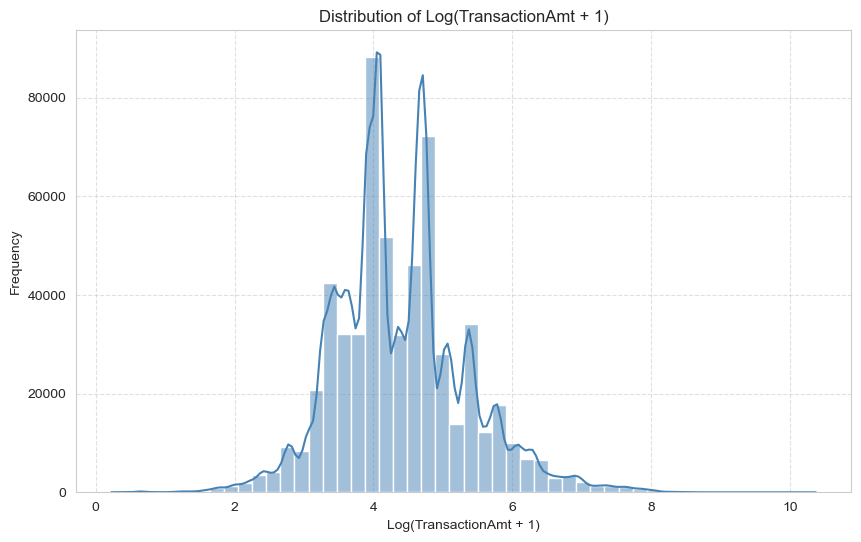

In [130]:
plt.figure(figsize=(10, 6))

log_transaction_amt = np.log1p(df_features['TransactionAmt'].dropna())

sns.histplot(log_transaction_amt, bins=50, kde=True, color='steelblue')

plt.title("Distribution of Log(TransactionAmt + 1)")
plt.xlabel("Log(TransactionAmt + 1)")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

- This distribution reveals a biomodal one, indicating the presence of 2 distinct clusters or modes within the transaction amounts.
- We can also see the data is not uniformly distributed and likely reflects two different patterns of spending behavior or transaction types.

**Bar plot - Distribution of ProductCD**

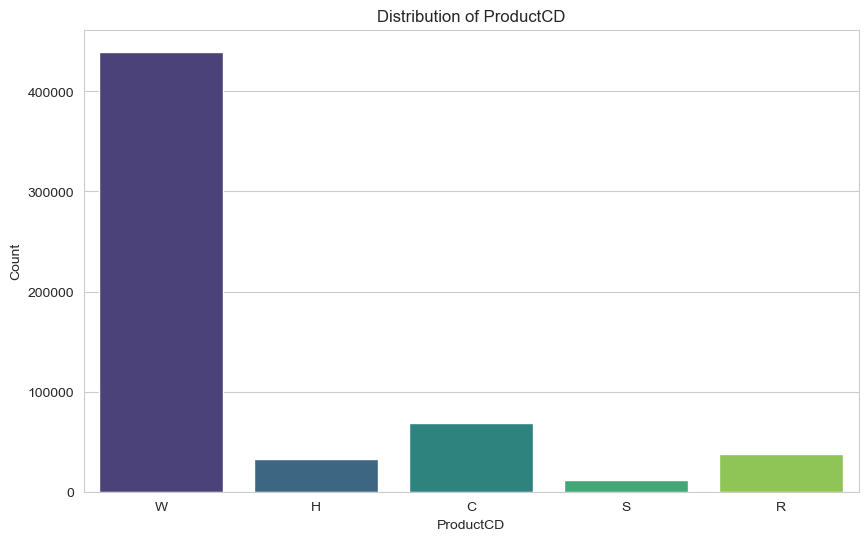

In [134]:
plt.figure()
sns.countplot(data=df_features, x='ProductCD', hue='ProductCD', palette='viridis',legend=False)
plt.title("Distribution of ProductCD")
plt.xlabel("ProductCD")
plt.ylabel("Count")
plt.show()

- This bar plot reveals a highly imbalanced distribution with 'W' as the dominant category.
- The 'W' bar is substantially taller than all other bars, indicating a significantly higher frequency of 'W' values compared to 'H', 'C', 'S', and 'R'.
- This suggests that the product or transaction type represented by 'W' is by far the most common in the dataset.
- While 'W' is dominant, there are still counts for the other categories. 'H' and 'C' have moderately higher counts than 'S' and 'R', suggesting they are still present, but at a much lower frequency than 'W'

**Bar plot- distribution of card4 (card type)**

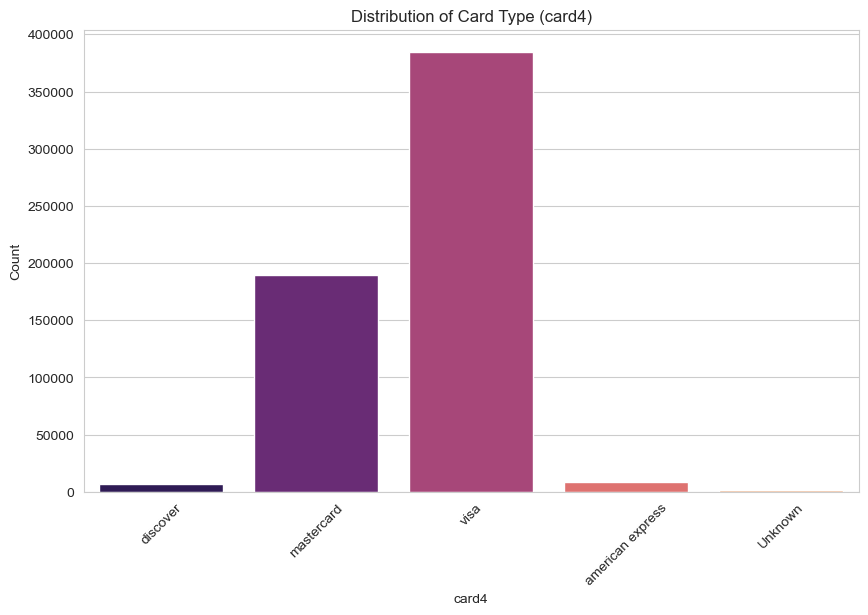

In [138]:
plt.figure()
sns.countplot(data=df_features, x='card4', hue='card4', palette='magma', legend=False)
plt.title("Distribution of Card Type (card4)")
plt.xlabel("card4")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

- The vast majority of transaction are made with Visa cards, indicating it's the most prevalent card type in this dataset.
- Mastercard is the second most used card, with its frequency significantly lower than Visa.
- Discover, American Express, and unknown card types are used infrequently.
- There is a strong class imbalance, potentially leading to bias in models trained on this data.
-  The 'Unknown' category might indicate missing or improperly recorded data, warranting further investigation.

# Data Visualization - Bivariate & Correlation Analyses

**Scatterplot - TransactionAmt vs. Addr1**

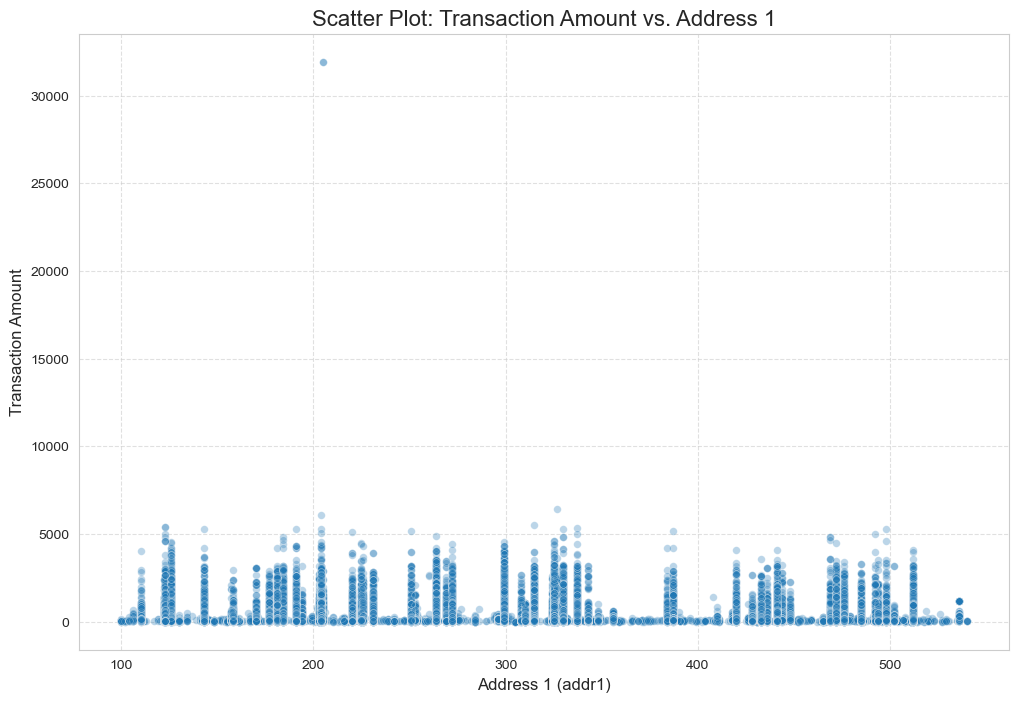

In [142]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='addr1',y='TransactionAmt', data=df_features, alpha=0.3, s=30, marker='o')
plt.title("Scatter Plot: Transaction Amount vs. Address 1", fontsize=16)
plt.xlabel("Address 1 (addr1)", fontsize=12)
plt.ylabel("Transaction Amount", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

- We cannot see a strong linear relationship between 'TransactionAmt' and 'addr1'; the points are scattered randomly across the plot.
- Majority of transactions are concentrated at lower amounts, around below 5000, regardless of the 'addr1' value.
- There are a few data points with significantly higher transaction amounts (above 20000), which could be potential outliers.
- Based on this visualization, 'addr1' alone does not appear to be a strong predictor of 'TransactionAmt'.

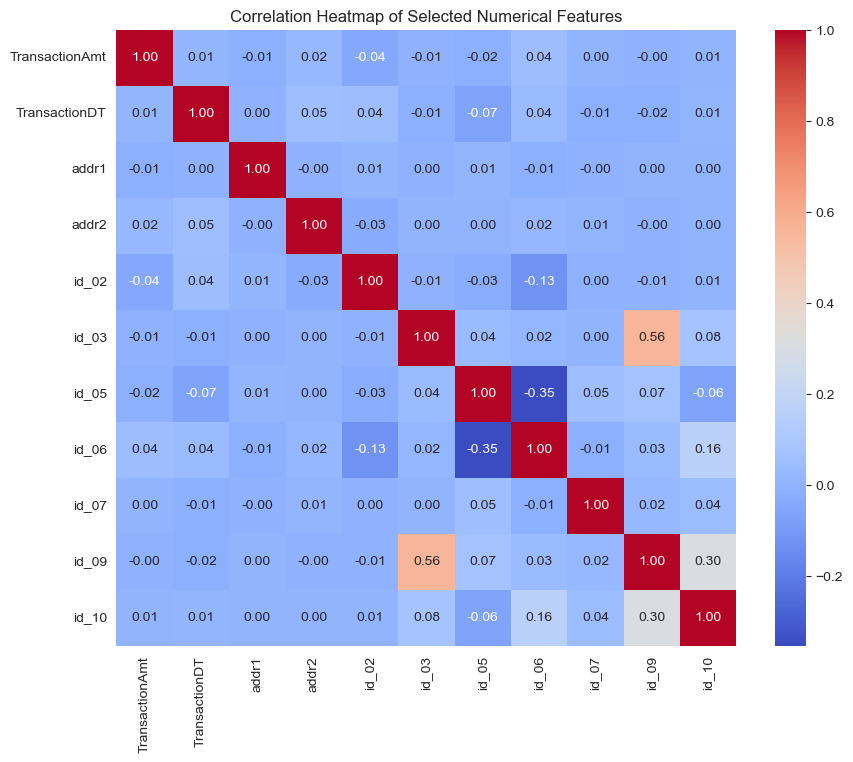

In [71]:
#Computing and visualizing a correlation matrix

numeric_features = df_features.select_dtypes(include=[np.number])
corr_matrix = numeric_features.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Heatmap of Selected Numerical Features")
plt.show()

- Most of the correlation coefficients are close to zero, indicating weak linear relationships between the selected numerical features.
- There aren't any pairs of features with a strong positive correlation either (close to 1).
- There is a notable moderate negative correlation between 'id_05' and 'id_06' (-0.35). This suggests that as 'id_05' increases, 'id_06' tends to decrease, and vice versa.
- There is a moderate positive correlation between 'id_03' and 'id_09' (0.56) and also between 'id_09' and 'id_10' (0.30).
- 'TransactionAmt' shows very weak correlations with all other features, suggesting it's relatively independent of the other variables in this selection.
- 'TransactionDT' also shows very weak correlation with most of the features.
- In conclusion, this heatmap indicates that linear relationships between these numerical features are generally weak. It also highlights the importance of considering non-linear relationships and potential feature interactions, as simple linear correlations are not very strong in this dataset.

# Inferential Statistics - checking for statistically significant patterns in this dataset

In [79]:
from scipy.stats import ttest_ind

#checking to see if fraudulent transactions have different amounts

fraudulent = df[df['isFraud'] == 1]['TransactionAmt']
non_fraudulent = df[df['isFraud'] == 0]['TransactionAmt']

#performing a t-test
t_stat, p_value = ttest_ind(fraudulent, non_fraudulent, equal_var=False)
print(f"T-test results: t-statistic = {t_stat: .4f}, p_value = {p_value: .4f}")

if p_value < 0.05:
    print("Significant difference in TransactionAmt between fraudulent and non-fraudulent transactions.")
else:
    print("No significant difference in TransactionAmt.")

T-test results: t-statistic =  8.9494, p_value =  0.0000
Significant difference in TransactionAmt between fraudulent and non-fraudulent transactions.


- There is a significant difference in 'TransactionAmt' between fraudulent and non-fraudulent transactions.
-  Fraudulent transactions tend to have different transaction amounts compared to non-fraudulent ones.

# Feature Engineering

In [86]:
#Log Transform the TransactionAmt
df_features.loc[:, 'TransactionAmt_log'] = np.log1p(df_features['TransactionAmt'])

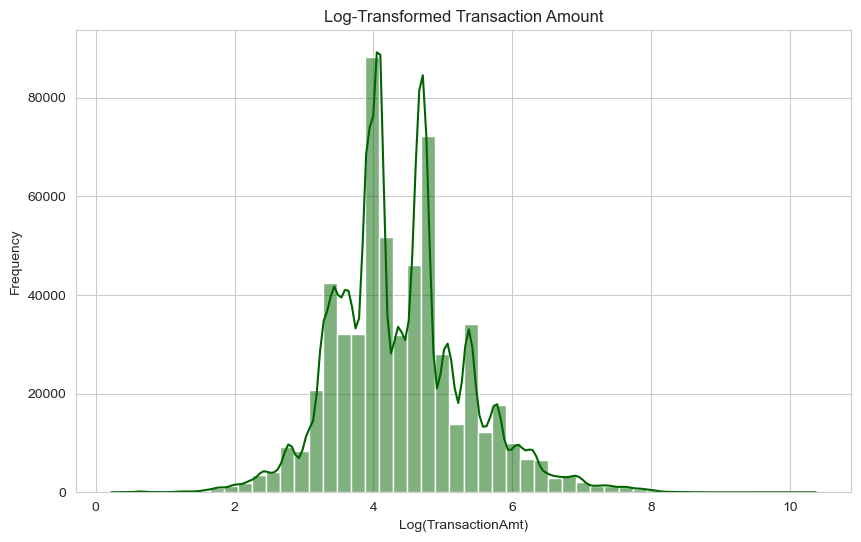

In [88]:
#Histogram of the log-transformed TransactionAmt!

plt.figure()
sns.histplot(df_features['TransactionAmt_log'].dropna(), bins=50, kde=True, color='darkgreen')
plt.title("Log-Transformed Transaction Amount")
plt.xlabel("Log(TransactionAmt)")
plt.ylabel("Frequency")
plt.show()

- This log transformation normalized the distribution of 'TransactionAmt'.
- The histogram also confirms the presence of a bimodal distribution, suggesting two distinct groups or patterns within the transaction amounts.
- The bimodal pattern highlights the possibility of two different types of transactions or customer segments.

In [93]:
#Bin TransactionAmt into categories!

df_features.loc[:, 'Amt_Bin'] = pd.cut(df_features['TransactionAmt_log'], bins=5, labels=False)

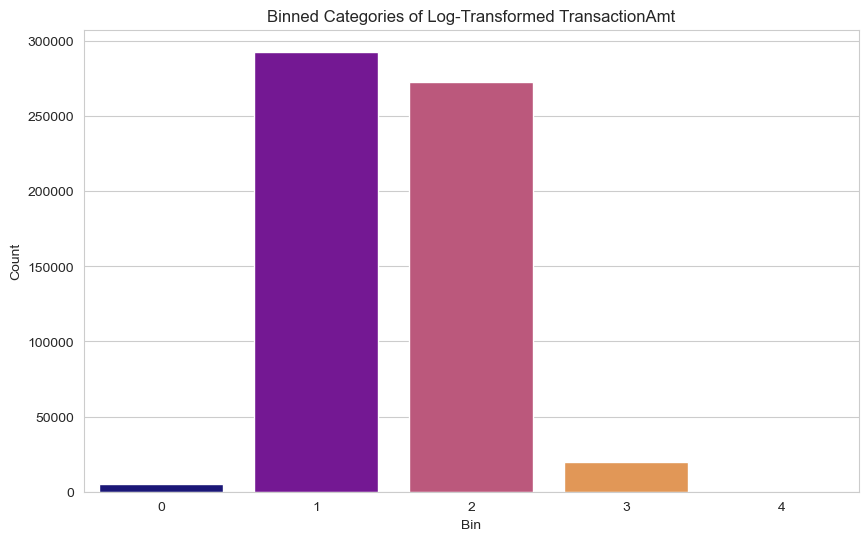

In [95]:
#Bar plot visualization of binned TransactionAmt

plt.figure()
sns.countplot(x='Amt_Bin', data=df_features, hue='Amt_Bin', palette='plasma', legend=False)
plt.title("Binned Categories of Log-Transformed TransactionAmt")
plt.xlabel("Bin")
plt.ylabel("Count")
plt.show()

- The majority of transactions fall within bins 1 and 2, indicating a concentration of transaction amounts in the middle ranges after the log transformation.
- Bins 0, 3, and 4 have significantly fewer transactions.
- The distribution of transactions across the bins is uneven, highlighting that transaction amounts are not uniformly distributed.
- The 'Amt_Bin' feature successfully converted the continuous 'TransactionAmt_log' into a categorical variable, simplifying the analysis of transaction amount ranges.

# Summary of my EDA Findings

In [110]:
print("""
### Key Takeaways:
- TransactionAmt follows a right-skewed distribution; a log transformation is useful.
- Some categorical features like ProductCD & card4 show distinct distributions.
- The correlation analysis also revealed significant relationships among the numerical features.
- Inferential statistics suggest a potential difference in TransactionAmt for fraudulent vs. non-fraudulent transactions.
- Feature engineering improved the data distributions that we saw here.

### Next Steps:
- Perform a deeper feature engineering.
- Handle missing data and outliers more effectively.
- Proceed to the machine learning model development.
""")


### Key Takeaways:
- TransactionAmt follows a right-skewed distribution; a log transformation is useful.
- Some categorical features like ProductCD & card4 show distinct distributions.
- The correlation analysis also revealed significant relationships among the numerical features.
- Inferential statistics suggest a potential difference in TransactionAmt for fraudulent vs. non-fraudulent transactions.
- Feature engineering improved the data distributions that we saw here.

### Next Steps:
- Perform a deeper feature engineering.
- Handle missing data and outliers more effectively.
- Proceed to the machine learning model development.

